In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


img_dir = "/content/drive/MyDrive/Datasets/Potholes/images"
mask_dir = "/content/drive/MyDrive/Datasets/Potholes/annotations"

In [ ]:
print("Görüntü dosyaları:")
print(os.listdir(img_dir)[:5])

print("Maske dosyaları:")
print(os.listdir(mask_dir)[:5])


Görüntü dosyaları:
['potholes1.png', 'potholes118.png', 'potholes100.png', 'potholes0.png', 'potholes116.png']
Maske dosyaları:
['potholes107.xml', 'potholes105.xml', 'potholes103.xml', 'potholes101.xml', 'potholes104.xml']


In [ ]:
import xml.etree.ElementTree as ET

xml_dir = mask_dir
yolo_output_dir = "/content/drive/MyDrive/Datasets/Potholes/labels"
os.makedirs(yolo_output_dir, exist_ok=True)

def convert_to_yolo(xml_file, img_shape):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    w, h = img_shape

    yolo_lines = []

    for obj in root.findall('object'):
        class_name = obj.find('name').text.lower().strip()
        class_id = 0

        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)


        x_center = ((xmin + xmax) / 2) / w
        y_center = ((ymin + ymax) / 2) / h
        bbox_width = (xmax - xmin) / w
        bbox_height = (ymax - ymin) / h

        yolo_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}")

    return yolo_lines


for xml_file in os.listdir(xml_dir):
    if not xml_file.endswith(".xml"):
        continue

    xml_path = os.path.join(xml_dir, xml_file)
    img_file = xml_file.replace(".xml", ".png")
    img_path = os.path.join(img_dir, img_file)

    if not os.path.exists(img_path):
        continue

    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    yolo_lines = convert_to_yolo(xml_path, (w, h))


    txt_filename = os.path.join(yolo_output_dir, xml_file.replace(".xml", ".txt"))
    with open(txt_filename, "w") as f:
        f.write("\n".join(yolo_lines))


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

image_dir = "/content/drive/MyDrive/Datasets/Potholes/images"
label_dir = "/content/drive/MyDrive/Datasets/Potholes/labels"

train_img_dir = "/content/drive/MyDrive/Datasets/Potholes/yolo/images/train"
val_img_dir = "/content/drive/MyDrive/Datasets/Potholes/yolo/images/val"
train_lbl_dir = "/content/drive/MyDrive/Datasets/Potholes/yolo/labels/train"
val_lbl_dir = "/content/drive/MyDrive/Datasets/Potholes/yolo/labels/val"

for d in [train_img_dir, val_img_dir, train_lbl_dir, val_lbl_dir]:
    os.makedirs(d, exist_ok=True)


all_images = [f for f in os.listdir(image_dir) if f.endswith(".png") or f.endswith(".jpg")]
train_imgs, val_imgs = train_test_split(all_images, test_size=0.2, random_state=42)


for file in train_imgs:
    shutil.copy(os.path.join(image_dir, file), os.path.join(train_img_dir, file))
    label_file = file.replace(".png", ".txt").replace(".jpg", ".txt")
    shutil.copy(os.path.join(label_dir, label_file), os.path.join(train_lbl_dir, label_file))

for file in val_imgs:
    shutil.copy(os.path.join(image_dir, file), os.path.join(val_img_dir, file))
    label_file = file.replace(".png", ".txt").replace(".jpg", ".txt")
    shutil.copy(os.path.join(label_dir, label_file), os.path.join(val_lbl_dir, label_file))


In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 131.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
yaml_content = """
path: /content/drive/MyDrive/Datasets/Potholes/yolo
train: images/train
val: images/val

names:
  0: pothole
"""

with open("/content/drive/MyDrive/Datasets/Potholes/yolo/data.yaml", "w") as f:
    f.write(yaml_content)


In [ ]:
from ultralytics import YOLO


model = YOLO("yolov8n.pt")

model.train(
    data="/content/drive/MyDrive/Datasets/Potholes/yolo/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="pothole_detector"
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 114MB/s]


Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Datasets/Potholes/yolo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pothole_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=

100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.1 ms, read: 0.7±0.5 MB/s, size: 352.1 KB)


train: Scanning /content/drive/MyDrive/Datasets/Potholes/yolo/labels/train.cache... 532 images, 0 backgrounds, 0 corrupt: 100%|██████████| 532/532 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 2.3±2.3 ms, read: 1.0±0.8 MB/s, size: 510.1 KB)


val: Scanning /content/drive/MyDrive/Datasets/Potholes/yolo/labels/val.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]


Plotting labels to runs/detect/pothole_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/pothole_detector
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.07G      1.629      2.628      1.552         13        640: 100%|██████████| 34/34 [00:32<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:33<00:00,  6.69s/it]

                   all        133        380      0.734     0.0368       0.17     0.0805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.59G       1.51      1.931      1.448         21        640: 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        133        380      0.443       0.35      0.361      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.59G      1.509      1.809       1.45         26        640: 100%|██████████| 34/34 [00:16<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        133        380      0.294        0.3      0.215     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.59G      1.578      1.772      1.484         15        640: 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


                   all        133        380      0.451      0.371      0.355      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.59G      1.527      1.697      1.447         22        640: 100%|██████████| 34/34 [00:14<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        133        380      0.512      0.405       0.41      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.6G      1.494      1.576      1.432         13        640: 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]


                   all        133        380      0.447      0.318      0.339      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.6G      1.477      1.538      1.426         32        640: 100%|██████████| 34/34 [00:14<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]


                   all        133        380      0.541      0.466      0.484       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.6G      1.447      1.463      1.381         14        640: 100%|██████████| 34/34 [00:14<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        133        380      0.611      0.537      0.569      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.6G      1.446      1.444      1.368         14        640: 100%|██████████| 34/34 [00:14<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        133        380      0.558      0.513      0.511       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.6G      1.386      1.363       1.34         35        640: 100%|██████████| 34/34 [00:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        133        380      0.694      0.549      0.592      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.6G      1.385      1.306      1.338         31        640: 100%|██████████| 34/34 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        133        380       0.64      0.574      0.625       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.61G      1.354      1.309      1.316         13        640: 100%|██████████| 34/34 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        133        380      0.681      0.605       0.66      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.61G       1.35      1.281      1.313         11        640: 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

                   all        133        380      0.609      0.583        0.6      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.61G       1.35       1.22      1.307         11        640: 100%|██████████| 34/34 [00:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        133        380      0.743      0.571      0.647      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.61G      1.339      1.221      1.329         12        640: 100%|██████████| 34/34 [00:14<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        133        380      0.667      0.533      0.579      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.61G      1.354      1.223      1.328         40        640: 100%|██████████| 34/34 [00:14<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]

                   all        133        380      0.697      0.632      0.669      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.61G      1.315       1.17      1.299         10        640: 100%|██████████| 34/34 [00:14<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        133        380      0.651      0.668      0.697      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.63G      1.288      1.142      1.289         10        640: 100%|██████████| 34/34 [00:14<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        133        380      0.659      0.624      0.685      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.64G      1.282      1.139      1.287         20        640: 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        133        380      0.679      0.618      0.666      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.66G      1.292      1.122      1.295         27        640: 100%|██████████| 34/34 [00:14<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        133        380      0.751      0.602      0.685      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.68G       1.24      1.088      1.253         14        640: 100%|██████████| 34/34 [00:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]

                   all        133        380      0.697      0.605      0.659      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.69G      1.222      1.039       1.23         19        640: 100%|██████████| 34/34 [00:16<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all        133        380      0.771      0.646      0.726      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.71G      1.233      1.057      1.251         20        640: 100%|██████████| 34/34 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        133        380      0.745      0.626      0.705      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.73G      1.225      1.051      1.232         22        640: 100%|██████████| 34/34 [00:14<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]


                   all        133        380       0.69      0.626      0.699      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.75G      1.247      1.067       1.28          8        640: 100%|██████████| 34/34 [00:14<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        133        380      0.722      0.618      0.714      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.75G      1.207      1.009      1.237         18        640: 100%|██████████| 34/34 [00:14<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        133        380      0.728      0.626      0.713      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.75G      1.193      1.016      1.241         14        640: 100%|██████████| 34/34 [00:14<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        133        380      0.727      0.645      0.716      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.75G      1.182     0.9826      1.221         12        640: 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        133        380      0.853      0.587      0.719      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.75G      1.146     0.9485      1.216         38        640: 100%|██████████| 34/34 [00:14<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        133        380      0.791      0.632       0.72      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.75G      1.155      0.937      1.197         13        640: 100%|██████████| 34/34 [00:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        133        380      0.756      0.645      0.745      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.75G       1.15     0.9734      1.199          8        640: 100%|██████████| 34/34 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        133        380      0.751      0.658      0.741      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.75G      1.116     0.9006      1.168         19        640: 100%|██████████| 34/34 [00:14<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        133        380      0.792      0.618      0.745      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.75G      1.138     0.8833      1.167         16        640: 100%|██████████| 34/34 [00:14<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        133        380      0.775      0.606      0.714      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.75G       1.07     0.8825      1.154         30        640: 100%|██████████| 34/34 [00:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]


                   all        133        380      0.767      0.668      0.734      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.75G      1.125     0.8954      1.173         13        640: 100%|██████████| 34/34 [00:14<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        133        380      0.756      0.676      0.763      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.75G      1.097      0.881      1.164         18        640: 100%|██████████| 34/34 [00:14<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]

                   all        133        380      0.789      0.595      0.717      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.75G      1.081     0.8301      1.151         17        640: 100%|██████████| 34/34 [00:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        133        380      0.828      0.673      0.759       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.75G      1.073     0.8439      1.142         16        640: 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        133        380      0.803      0.663      0.758      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.75G      1.057     0.8315      1.155         17        640: 100%|██████████| 34/34 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]

                   all        133        380      0.796      0.645      0.735      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.75G      1.029     0.8126      1.131         21        640: 100%|██████████| 34/34 [00:14<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        133        380      0.821      0.632      0.753      0.484


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.75G     0.9743     0.8292      1.087          7        640: 100%|██████████| 34/34 [00:17<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]

                   all        133        380      0.795      0.633      0.739      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.75G     0.9546     0.7516      1.092          9        640: 100%|██████████| 34/34 [00:14<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        133        380      0.738      0.666      0.725      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.75G     0.9608     0.7161      1.082          7        640: 100%|██████████| 34/34 [00:13<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        133        380      0.809      0.629      0.729      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.75G       0.92     0.6657      1.055          4        640: 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]

                   all        133        380      0.775      0.674      0.741      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.75G     0.9225     0.6837      1.056         21        640: 100%|██████████| 34/34 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        133        380       0.81      0.664      0.752      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.75G     0.9128     0.6557      1.053          7        640: 100%|██████████| 34/34 [00:14<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        133        380      0.834      0.647       0.76      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.75G     0.8707     0.6421      1.043          5        640: 100%|██████████| 34/34 [00:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        133        380      0.805      0.658      0.745      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.75G     0.8905     0.6403      1.046          7        640: 100%|██████████| 34/34 [00:13<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        133        380      0.821      0.651      0.745      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.75G     0.8729     0.6258      1.036          4        640: 100%|██████████| 34/34 [00:14<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        133        380      0.797      0.671       0.75      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.75G     0.8735      0.622      1.026         10        640: 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]


                   all        133        380      0.798      0.664      0.753      0.488

50 epochs completed in 0.256 hours.
Optimizer stripped from runs/detect/pothole_detector/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/pothole_detector/weights/best.pt, 6.2MB

Validating runs/detect/pothole_detector/weights/best.pt...
Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


                   all        133        380      0.796      0.663      0.753      0.488
Speed: 0.5ms preprocess, 2.9ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/pothole_detector


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78356f1f6ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
log_path = "/content/runs/detect/pothole_detector/results.csv"
df = pd.read_csv(log_path)

print("Sütunlar:")
print(df.columns.tolist())


Sütunlar:
['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


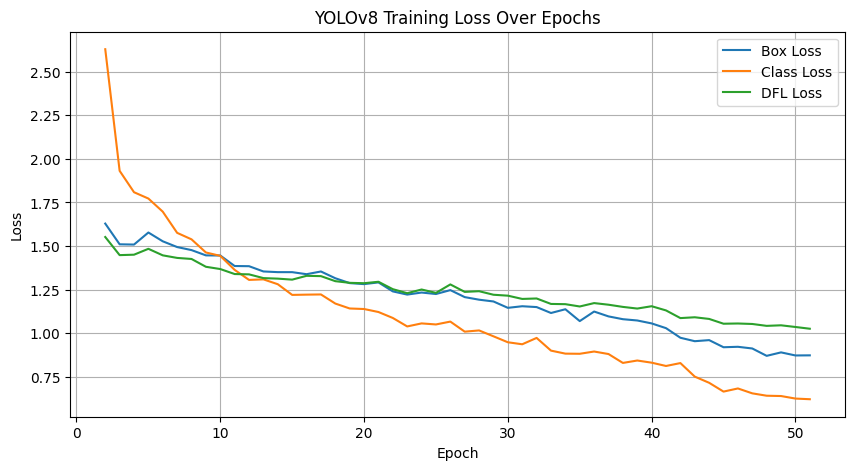

In [ ]:
import matplotlib.pyplot as plt

epochs = df['epoch'] + 1

plt.figure(figsize=(10, 5))
plt.plot(epochs, df['train/box_loss'], label='Box Loss')
plt.plot(epochs, df['train/cls_loss'], label='Class Loss')
plt.plot(epochs, df['train/dfl_loss'], label='DFL Loss')
plt.title("YOLOv8 Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

final_row = df.iloc[-1]

precision = final_row['metrics/precision(B)']
recall = final_row['metrics/recall(B)']
map_50 = final_row['metrics/mAP50(B)']
map_50_95 = final_row['metrics/mAP50-95(B)']

print(f"🎯 Model Başarı Özeti (Son Epoch):")
print(f"- Precision: %{precision * 100:.2f}")
print(f"- Recall: %{recall * 100:.2f}")
print(f"- mAP@0.5: %{map_50 * 100:.2f}")
print(f"- mAP@0.5:0.95: %{map_50_95 * 100:.2f}")


🎯 Model Başarı Özeti (Son Epoch):
- Precision: %79.77
- Recall: %66.40
- mAP@0.5: %75.32
- mAP@0.5:0.95: %48.80



image 1/1 /content/drive/MyDrive/Datasets/Potholes/images/potholes123.png: 640x640 4 potholes, 7.5ms
Speed: 3.0ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


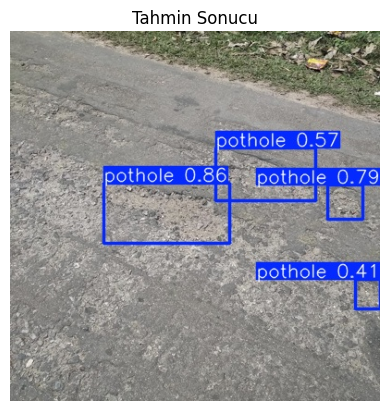

In [ ]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt


model = YOLO("/content/runs/detect/pothole_detector/weights/best.pt")


img_path = "/content/drive/MyDrive/Datasets/Potholes/images/potholes123.png"
results = model(img_path)

results[0].save(filename="result.jpg")

img = cv2.imread("result.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.title("Tahmin Sonucu")
plt.show()


In [ ]:

!pip install ultralytics --quiet


from ultralytics import YOLO


model_path = "/content/runs/detect/pothole_detector/weights/best.pt"
model = YOLO(model_path)


video_path = "/content/drive/MyDrive/Smart.mp4"

model.predict(
    source=video_path,
    save=True,
    save_txt=False,
    imgsz=640,
    conf=0.3,
    name="pot_video"
)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1719) /content/drive/MyDrive/Smart.mp4: 224x640 (no detections), 40.4ms
video 1/1 (frame 2/1719) /content/drive/MyDrive/Smart.mp4: 224x640 (no detections), 7.1ms
video 1/1 (frame 3/1719) /content/drive/MyDrive/Smart.mp4: 224x640 (no detections), 8.4ms
video 1/1 (frame 4/1719) /content/drive/MyDrive/Smart.mp4: 224x640 (no detections), 6.9ms
video 1/1 (frame 5/1719) /content/drive/MyDrive/Smart.mp4: 224x640 (no detections), 9.1ms
video

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pothole'}
 obb: None
 orig_img: array([[[27, 39, 38],
         [30, 42, 41],
         [42, 54, 53],
         ...,
         [19, 33, 33],
         [17, 31, 31],
         [16, 30, 30]],
 
        [[ 9, 21, 20],
         [19, 31, 30],
         [40, 52, 51],
         ...,
         [19, 33, 33],
         [17, 31, 31],
         [16, 30, 30]],
 
        [[ 8, 20, 19],
         [13, 25, 24],
         [32, 44, 43],
         ...,
         [19, 33, 33],
         [17, 31, 31],
         [16, 30, 30]],
 
        ...,
 
        [[ 2,  0,  0],
         [ 2,  0,  0],
         [ 2,  0,  0],
         ...,
         [39, 39, 39],
         [36, 36, 36],
         [33, 33, 33]],
 
        [[ 2,  0,  0],
         [ 2,  0,  0],
         [ 2,  0,  0],
         ...,
         [34, 34, 34],
         [32, 32, 32],
         [30, 30, 30]],
 
        [[ 2,  0,  0],
   

In [ ]:
from google.colab import files
files.download("/content/runs/detect/pot_video2/Smart.avi")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>